### DSC530-301 Data Exploration and Analysis 
* ***************************************** *
* Author: Sheetal Munjewar
* Date: 04/02/2023
* Title: "DSC530-301 Week-03 Assignment-1.1, 1.2, 2.1 and 2.4"
* ***************************************** *


In [1]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [2]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)

Read NSFG data into a Pandas DataFrame.

In [3]:
import nsfg
import numpy as np

In [4]:
preg = nsfg.ReadFemPreg()
preg.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


## Exercise 1.1

Select the `birthord` column, print the value counts, and compare to results published in the [codebook](ftp://ftp.cdc.gov/pub/Health_Statistics/NCHS/Dataset_Documentation/NSFG/Cycle6Codebook-Pregnancy.pdf)

In [5]:
preg.birthord.value_counts().sort_index()

1.0     4413
2.0     2874
3.0     1234
4.0      421
5.0      126
6.0       50
7.0       20
8.0        7
9.0        2
10.0       1
Name: birthord, dtype: int64

Find NULL values in a column using isnull()
We can also use `isnull` to count the number of nans.

In [6]:
preg.birthord.isnull().sum()

4445

Select the `prglngth` column, print the value counts, and compare to results published in the [codebook](ftp://ftp.cdc.gov/pub/Health_Statistics/NCHS/Dataset_Documentation/NSFG/Cycle6Codebook-Pregnancy.pdf)

Code book total count matched with following command output : 13593

In [7]:
   
preg.prglngth.value_counts().sort_index()
preg.prglngth.value_counts().sum()


13593

To compute the mean of a column, you can invoke the `mean` method on a Series.  For example, here is the mean birthweight in pounds:

In [8]:
preg.totalwgt_lb.mean()

7.265628457623368

Create a new column named <tt>totalwgt_kg</tt> that contains birth weight in kilograms.  Compute its mean.  Remember that when you create a new column, you have to use dictionary syntax, not dot notation.

In [9]:
#  Solution
#  Created new column with name : totalwgt_kg, and calculated mean using mean() from newly derived column.

preg['totalwgt_kg'] = preg.totalwgt_lb / 2.2

# preg['totalwgt_lb'] 
# preg['totalwgt_kg']

preg.totalwgt_kg.mean()

3.302558389828807

`nsfg.py` also provides `ReadFemResp`, which reads the female respondents file and returns a `DataFrame`:

In [10]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz")

In [11]:
resp = nsfg.ReadFemResp()
type(resp)

pandas.core.frame.DataFrame

`DataFrame` provides a method `head` that displays the first five rows:

In [12]:
resp.head()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667


Select the `age_r` column from `resp` and print the value counts.  How old are the youngest and oldest respondents?

In [13]:
# Youngest Responder : 15
# Oldest Responder : 44

resp.age_r.value_counts().sort_index()


15    217
16    223
17    234
18    235
19    241
20    258
21    267
22    287
23    282
24    269
25    267
26    260
27    255
28    252
29    262
30    292
31    278
32    273
33    257
34    255
35    262
36    266
37    271
38    256
39    215
40    256
41    250
42    215
43    253
44    235
Name: age_r, dtype: int64

We can use the `caseid` to match up rows from `resp` and `preg`.  For example, we can select the row from `resp` for `caseid` 2298 like this:

In [14]:
resp[resp.caseid==2298]

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667


And we can get the corresponding rows from `preg` like this:

In [15]:
preg[preg.caseid==2298]

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb,totalwgt_kg
2610,2298,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750,3.125000
2611,2298,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,5.5000,2.500000
2612,2298,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,4.1875,1.903409
2613,2298,4,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750,3.125000


How old is the respondent with `caseid` 1?

In [16]:
# resp[resp.caseid==1]
# preg[preg.caseid==1]
resp[resp.caseid==1].age_r

1069    44
Name: age_r, dtype: int64

What are the pregnancy lengths for the respondent with `caseid` 2298?

In [17]:
# Solution 

preg[preg.caseid==2298].prglngth

2610    40
2611    36
2612    30
2613    40
Name: prglngth, dtype: int64

What was the birthweight of the first baby born to the respondent with `caseid` 5012?

In [18]:
# Solution 

preg[preg.caseid==5012].birthwgt_lb

5515    6.0
Name: birthwgt_lb, dtype: float64

## Exercise 1.2

Select the `pregnum` column, print the value counts, and compare to results published in the [codebook](ftp://ftp.cdc.gov/pub/Health_Statistics/NCHS/Dataset_Documentation/NSFG/Cycle6Codebook-Pregnancy.pdf)


In [19]:
# Solution - Following pregnum count matched with codebook count. 

preg.pregnum.value_counts().sort_index()

1     1267
2     2864
3     3330
4     2444
5     1525
6      900
7      560
8      320
9      189
10      90
11      33
12      24
14      28
19      19
Name: pregnum, dtype: int64

In [20]:
# Solution : You can also cross-validate the respondent and pregnancy files by comparing pregnum 
#            for each respondent with the number of records in the pregnancy file/
#           nsfg.ValidatePregnum(resp,preg) return True ( Number are matched and validated )

nsfg.ValidatePregnum(resp,preg)



True

In [21]:
# Solution : - 
# You can use nsfg.MakePregMap to make a dictionary that maps from each caseid to a list of indices into the pregnancy DataFrame.

preg_map = nsfg.MakePregMap(preg)

for caseid, indices in preg_map.items():
    print(caseid,indices)
    
    
#     if len(indices) >= 2:
#         pair = preg.loc[indices[0:2]].prglngth
#         diff = np.diff(pair)[0]
#         hist[diff] += 1


1 [0, 1]
2 [2, 3, 4]
6 [5, 6, 7]
7 [8, 9]
12 [10]
14 [11, 12, 13]
15 [14, 15, 16]
18 [17, 18]
21 [19, 20]
23 [21, 22]
24 [23, 24, 25]
28 [26]
31 [27, 28, 29]
36 [30, 31]
38 [32, 33, 34]
39 [35, 36]
44 [37, 38, 39, 40]
45 [41]
46 [42, 43]
49 [44, 45, 46, 47]
51 [48, 49, 50]
52 [51]
57 [52, 53, 54]
60 [55, 56]
63 [57, 58, 59]
69 [60]
70 [61, 62, 63, 64]
71 [65]
72 [66, 67]
73 [68, 69]
77 [70, 71]
80 [72, 73, 74, 75, 76]
81 [77]
86 [78, 79, 80]
90 [81, 82]
91 [83, 84, 85, 86, 87, 88, 89]
92 [90, 91, 92]
95 [93, 94]
101 [95, 96]
106 [97, 98, 99]
114 [100]
115 [101]
116 [102, 103]
118 [104, 105, 106]
119 [107, 108]
123 [109, 110]
129 [111]
132 [112, 113]
135 [114]
138 [115]
139 [116, 117]
142 [118, 119, 120, 121]
143 [122, 123]
145 [124, 125, 126, 127, 128, 129]
149 [130, 131, 132]
150 [133, 134, 135, 136, 137, 138]
151 [139]
152 [140, 141, 142, 143, 144, 145, 146]
153 [147, 148]
156 [149]
159 [150, 151]
160 [152, 153, 154, 155, 156]
172 [157, 158, 159]
173 [160]
176 [161, 162]
181 [163, 16

## Exercise 2.1

In [22]:
import numpy as np

In [23]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

Given a list of values, there are several ways to count the frequency of each value.

In [24]:
t = [1, 2, 2, 3, 5]

You can use a Python dictionary:

In [25]:
hist = {}
for x in t:
    hist[x] = hist.get(x, 0) + 1
    
hist

{1: 1, 2: 2, 3: 1, 5: 1}

You can use a `Counter` (which is a dictionary with additional methods):

In [26]:
from collections import Counter
counter = Counter(t)
counter

Counter({1: 1, 2: 2, 3: 1, 5: 1})

Or you can use the `Hist` object provided by `thinkstats2`:

In [27]:
import thinkstats2
hist = thinkstats2.Hist([1, 2, 2, 3, 5])
hist

Hist({1: 1, 2: 2, 3: 1, 5: 1})

`Hist` provides `Freq`, which looks up the frequency of a value.

In [28]:
hist.Freq(2)

2

You can also use the bracket operator, which does the same thing.

In [29]:
hist[2]

2

If the value does not appear, it has frequency 0.

In [30]:
hist[4]

0

The `Values` method returns the values:

In [31]:
hist.Values()

dict_keys([1, 2, 3, 5])

So you can iterate the values and their frequencies like this:

In [32]:
for val in sorted(hist.Values()):
    print(val, hist[val])

1 1
2 2
3 1
5 1


Or you can use the `Items` method:

In [33]:
for val, freq in hist.Items():
     print(val, freq)

1 1
2 2
3 1
5 1


`thinkplot` is a wrapper for `matplotlib` that provides functions that work with the objects in `thinkstats2`.

For example `Hist` plots the values and their frequencies as a bar graph.

`Config` takes parameters that label the x and y axes, among other things.

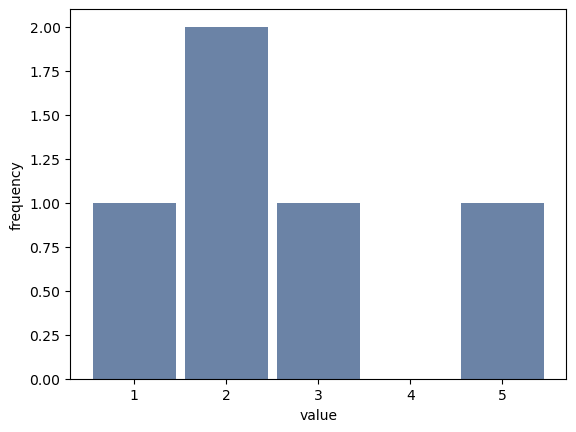

In [34]:
import thinkplot
thinkplot.Hist(hist)
thinkplot.Config(xlabel='value', ylabel='frequency')

As an example, I'll replicate some of the figures from the book.

First, I'll load the data from the pregnancy file and select the records for live births.

In [35]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)

In [36]:
import nsfg

In [37]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

Here's the histogram of birth weights in pounds.  Notice that `Hist` works with anything iterable, including a Pandas Series.  The `label` attribute appears in the legend when you plot the `Hist`. 

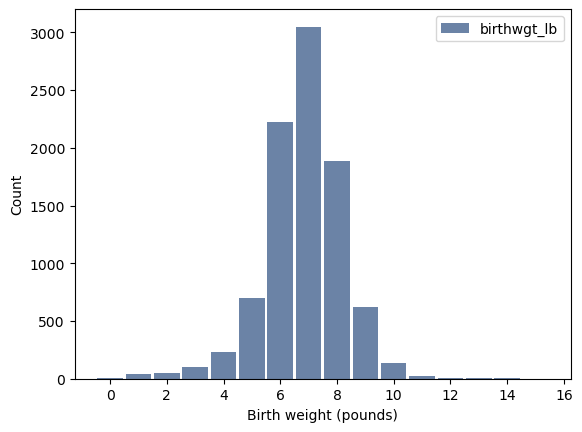

In [38]:
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='Count')

Before plotting the ages, I'll apply `floor` to round down:

In [39]:
ages = np.floor(live.agepreg)

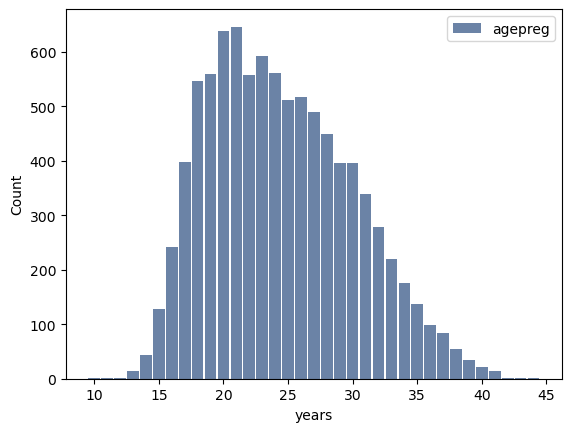

In [40]:
hist = thinkstats2.Hist(ages, label='agepreg')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='years', ylabel='Count')

As an exercise, plot the histogram of pregnancy lengths (column `prglngth`).

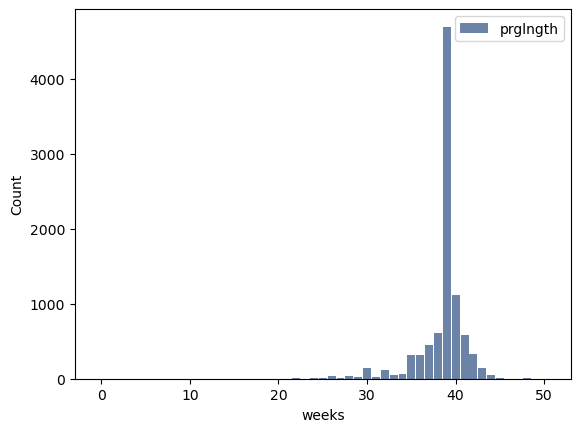

In [41]:
# Solution

hist = thinkstats2.Hist(live.prglngth, label='prglngth')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='weeks', ylabel='Count')

`Hist` provides smallest, which select the lowest values and their frequencies.

In [42]:
for weeks, freq in hist.Smallest(10):
    print(weeks, freq)

0 1
4 1
9 1
13 1
17 2
18 1
19 1
20 1
21 2
22 7



Use `Largest` to display the longest pregnancy lengths.

In [43]:
# Solution

for weeks, freq in hist.Largest(10):
    print(weeks, freq)


50 2
48 7
47 1
46 1
45 10
44 46
43 148
42 328
41 587
40 1116


From live births, we can select first babies and others using `birthord`, then compute histograms of pregnancy length for the two groups.

In [44]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

first_hist = thinkstats2.Hist(firsts.prglngth, label='first')
other_hist = thinkstats2.Hist(others.prglngth, label='other')

We can use `width` and `align` to plot two histograms side-by-side.

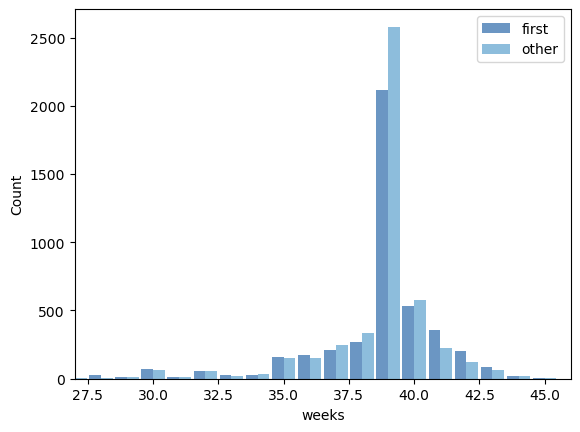

In [45]:
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='weeks', ylabel='Count', xlim=[27, 46])

`Series` provides methods to compute summary statistics:

In [46]:
mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()

Here are the mean and standard deviation:

In [47]:
mean, std

(38.56055968517709, 2.702343810070593)

As an exercise, confirm that `std` is the square root of `var`:

In [48]:
np.sqrt(var) == std

True

Here's are the mean pregnancy lengths for first babies and others:

In [49]:
firsts.prglngth.mean(), others.prglngth.mean()

(38.60095173351461, 38.52291446673706)

And here's the difference (in weeks):

In [50]:
firsts.prglngth.mean() - others.prglngth.mean()

0.07803726677754952

This functon computes the Cohen effect size, which is the difference in means expressed in number of standard deviations:

In [51]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

Compute the Cohen effect size for the difference in pregnancy length for first babies and others.

In [52]:
 CohenEffectSize(firsts.prglngth, others.prglngth)

0.028879044654449883

## Solution for Exercise : 2.4 

Using the variable `totalwgt_lb`, investigate whether first babies are lighter or heavier than others. 

Compute Cohen’s effect size to quantify the difference between the groups.  How does it compare to the difference in pregnancy length?

In [53]:
# Find the mean for both groups.

firsts.totalwgt_lb.mean(), others.totalwgt_lb.mean()

(7.201094430437772, 7.325855614973262)

In [54]:
CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb)

-0.088672927072602

###  Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others. 

Solution : 
                
Average mean weight for first babies : 7.201094430437772
Average mean weight for Other babies : 7.325855614973262

Above result indicates First babies are lighter than other babies.

### Compute Cohen’s d to quantify the difference between the groups. 

Solution : 

Cohen D reported value is begative (-0.088672927072602),very small impact and negative value indicates inverse relation between the groups, first baby weight increases with others decreases and vice versa.


### How does it compare to the difference in pregnancy length?

Solution : 

Mean pregnancy length for first babies is 38.601; for other babies it is 38.523.The difference is 0.078 weeks, which works out to 13 hours. As a fraction of the typical pregnancy length, this difference is about 0.2%.



For the next few exercises, we'll load the respondent file:

In [55]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz")

In [56]:
resp = nsfg.ReadFemResp()

Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](ftp://ftp.cdc.gov/pub/Health_Statistics/NCHS/Dataset_Documentation/NSFG/Cycle6Codebook-Pregnancy.pdf).

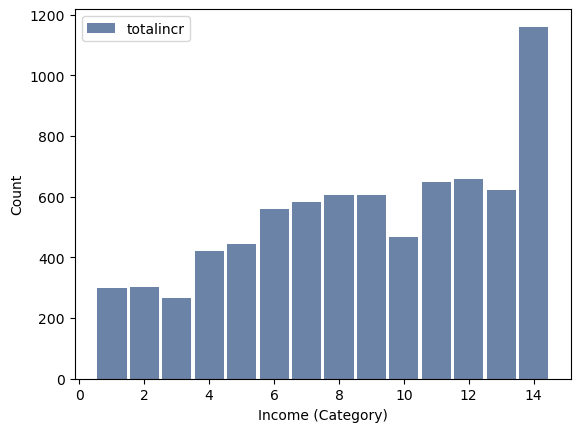

In [57]:
# Solution 

hist = thinkstats2.Hist(resp.totincr)
thinkplot.Hist(hist, label="totalincr")
thinkplot.config(xlabel='Income (Category)', ylabel='Count')

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

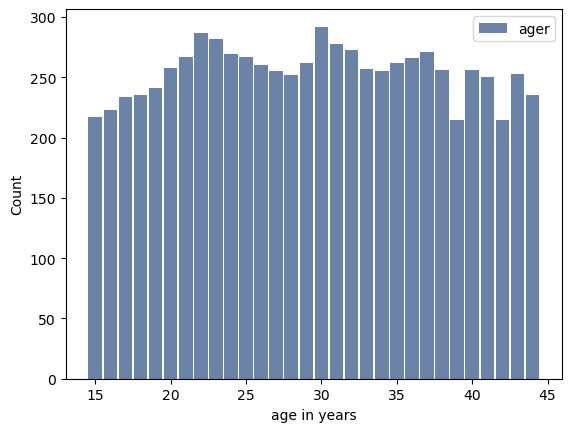

In [58]:
# Solution 

hist = thinkstats2.Hist(resp.ager)
thinkplot.Hist(hist, label='ager')
thinkplot.Config(xlabel='age in years',ylabel='Count')

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

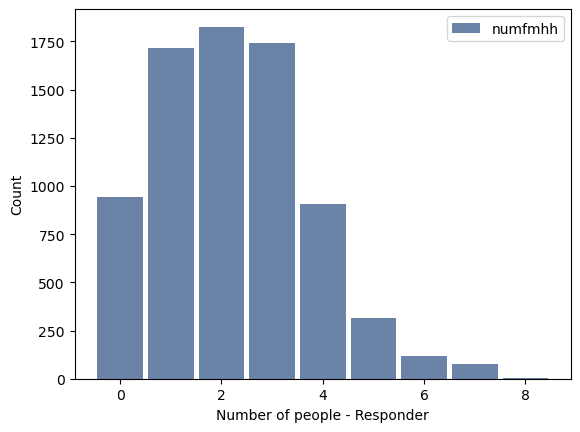

In [59]:
# Solution 

hist = thinkstats2.Hist(resp.numfmhh)
thinkplot.Hist(hist, label = "numfmhh")
thinkplot.Config(xlabel='Number of people - Responder',ylabel='Count')

Make a histogram of <tt>parity</tt>, the number of children borne by the respondent.  How would you describe this distribution?

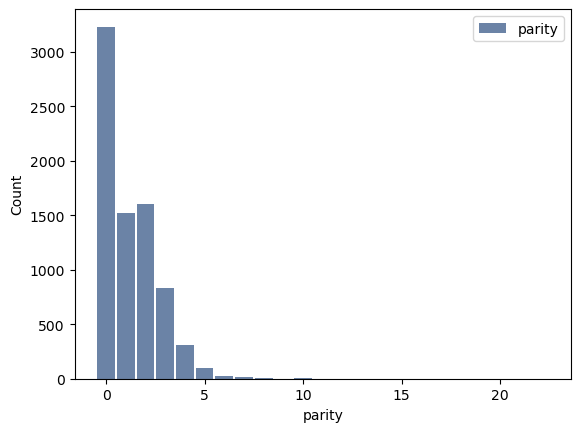

In [60]:
# Solution

# This distribution is positive-valued and skewed to the right.
# Value Label Total
# 0 0 BABIES 960
# 1 1 BABY 2636
# 2 2 BABIES 4394
# 3 3 BABIES 3118
# 4 4 BABIES 1510
# 5-95 5 OR MORE BIRTHS 975
# Total 13593

hist = thinkstats2.Hist(resp.parity)
thinkplot.Hist(hist, label='parity')
thinkplot.Config(xlabel='parity', ylabel='Count')

Use Hist.Largest to find the largest values of <tt>parity</tt>.

In [61]:
hist.Largest(5)

[(22, 1), (16, 1), (10, 3), (9, 2), (8, 8)]

Let's investigate whether people with higher income have higher parity.  Keep in mind that in this study, we are observing different people at different times during their lives, so this data is not the best choice for answering this question.  But for now let's take it at face value.

Use <tt>totincr</tt> to select the respondents with the highest income (level 14).  Plot the histogram of <tt>parity</tt> for just the high income respondents.

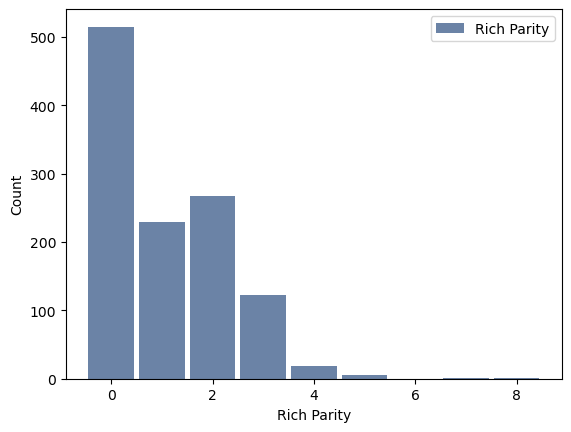

In [62]:
# Solution : 

# Highest Income Category : 14 DOCTORATE DEGREE 40

rich = resp[resp.totincr == 14]
rich
hist = thinkstats2.Hist(rich.parity)
thinkplot.Hist(hist, label='Rich Parity')
thinkplot.Config(xlabel='Rich Parity',ylabel='Count')

Find the largest parities for high income respondents.

In [63]:
# Solution

hist.Largest(10)

[(8, 1), (7, 1), (5, 5), (4, 19), (3, 123), (2, 267), (1, 229), (0, 515)]

Compare the mean <tt>parity</tt> for high income respondents and others.

In [64]:
# Solution

not_rich = resp[resp.totincr < 14]
rich.parity.mean(), not_rich.parity.mean()

(1.0758620689655172, 1.2495758136665125)

Compute the Cohen effect size for this difference.  How does it compare with the difference in pregnancy length for first babies and others?

In [65]:
# Solution

# This effect is about 10 times stronger than the difference in pregnancy length.
# But remembering the design of the study, we should not make too much of this
# apparent effect.

CohenEffectSize(rich.parity, not_rich.parity)

-0.1251185531466061